In [81]:
from IPython.display import Image

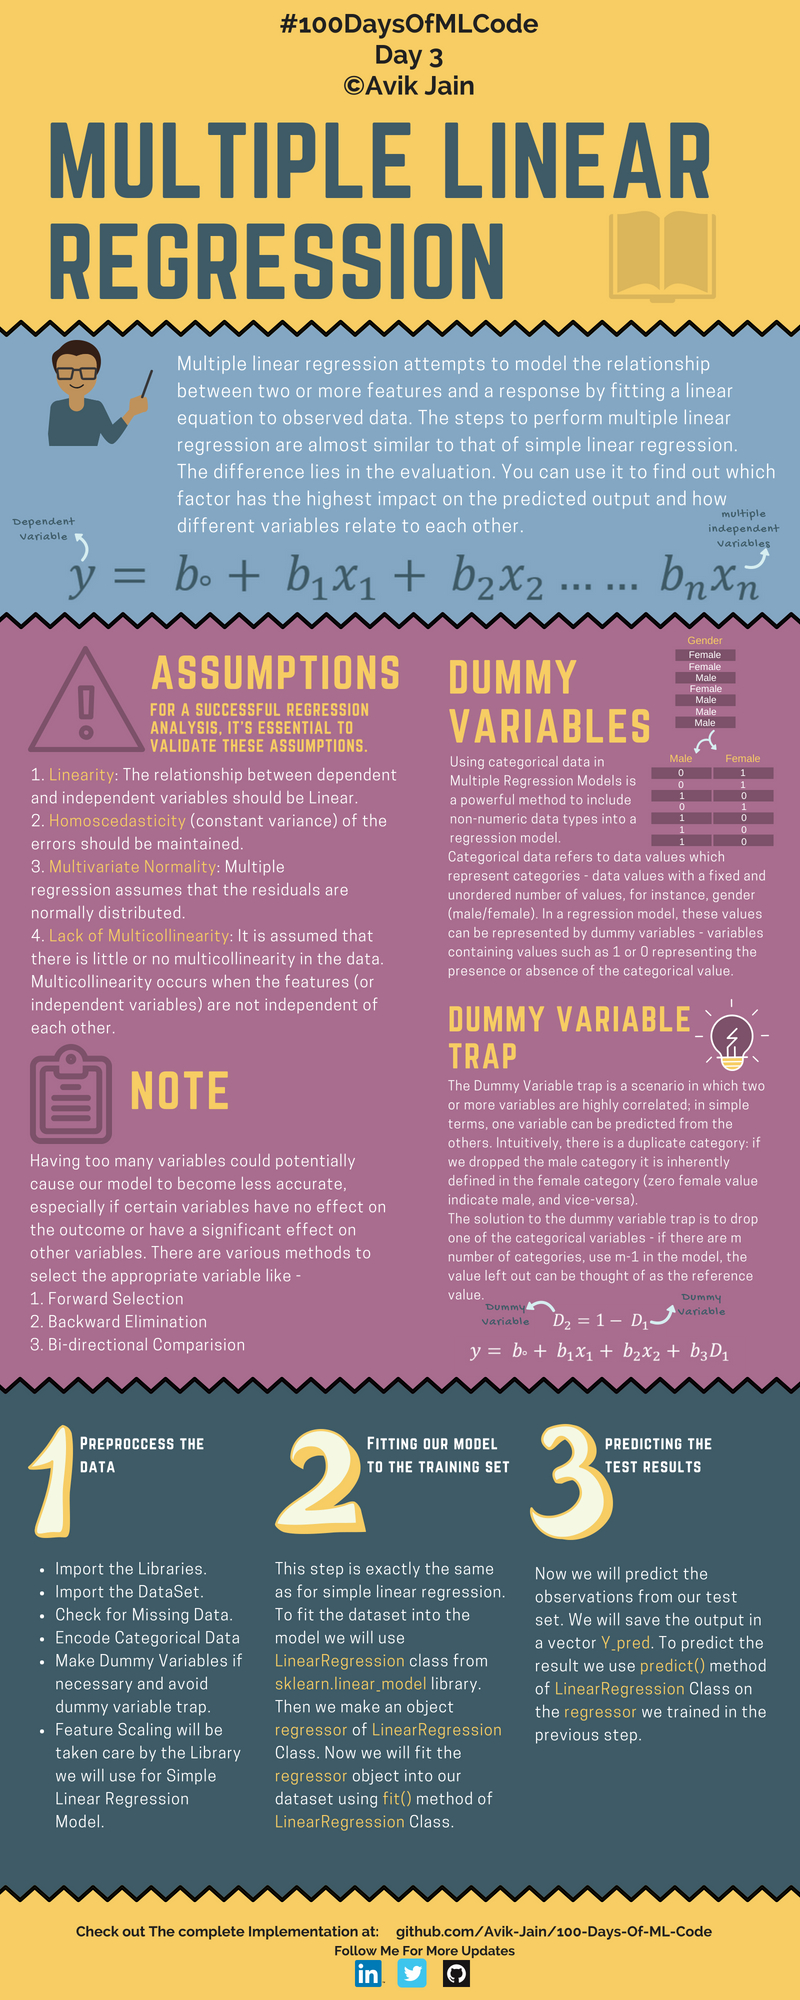

In [82]:
Image('../info-graphs/Day 3.jpg')

step 1: 数据预处理

导入需要的库

In [83]:
import numpy as np
import pandas as pd

导入数据库

In [84]:
dataset = pd.read_csv('../datasets/50_Startups.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [85]:
X = dataset.iloc[ : , :-1].values
Y = dataset.iloc[ : ,  4 ].values

编码分类变量

In [86]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [87]:
labelencoder = LabelEncoder()
x_eccoder = labelencoder.fit_transform(X[:, 3])
x_eccoder

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0])

In [88]:
categories = list(np.unique(X[:, 3]))
categories

['California', 'Florida', 'New York']

In [89]:
onehotencoder = OneHotEncoder(categories=[np.array(['California', 'Florida', 'New York'])])

In [90]:
x_eccoder = onehotencoder.fit_transform(X[:, 3].reshape(-1, 1))
x_eccoder

<50x3 sparse matrix of type '<class 'numpy.float64'>'
	with 50 stored elements in Compressed Sparse Row format>

In [91]:
x_eccoder = x_eccoder.toarray()
x_eccoder

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0

避免虚拟变量陷阱

In [92]:
X = np.hstack((X[:, :3], x_eccoder[:, :2]))
X

array([[165349.2, 136897.8, 471784.1, 0.0, 0.0],
       [162597.7, 151377.59, 443898.53, 1.0, 0.0],
       [153441.51, 101145.55, 407934.54, 0.0, 1.0],
       [144372.41, 118671.85, 383199.62, 0.0, 0.0],
       [142107.34, 91391.77, 366168.42, 0.0, 1.0],
       [131876.9, 99814.71, 362861.36, 0.0, 0.0],
       [134615.46, 147198.87, 127716.82, 1.0, 0.0],
       [130298.13, 145530.06, 323876.68, 0.0, 1.0],
       [120542.52, 148718.95, 311613.29, 0.0, 0.0],
       [123334.88, 108679.17, 304981.62, 1.0, 0.0],
       [101913.08, 110594.11, 229160.95, 0.0, 1.0],
       [100671.96, 91790.61, 249744.55, 1.0, 0.0],
       [93863.75, 127320.38, 249839.44, 0.0, 1.0],
       [91992.39, 135495.07, 252664.93, 1.0, 0.0],
       [119943.24, 156547.42, 256512.92, 0.0, 1.0],
       [114523.61, 122616.84, 261776.23, 0.0, 0.0],
       [78013.11, 121597.55, 264346.06, 1.0, 0.0],
       [94657.16, 145077.58, 282574.31, 0.0, 0.0],
       [91749.16, 114175.79, 294919.57, 0.0, 1.0],
       [86419.7, 153514.1

区分训练集和测试集

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

step 2: 拟合训练数据集到多元线性回归

In [95]:
from sklearn.linear_model import LinearRegression

In [96]:
model = LinearRegression()
model.fit(X_train, Y_train)
model

LinearRegression()

In [97]:
Y_pred = model.predict(X_test)
Y_pred

array([126362.87908254,  84608.45383635,  99677.49425148,  46357.46068582,
       128750.48288503,  50912.41741885, 109741.35032702, 100643.24281646,
        97599.27574595, 113097.42524433])

In [100]:
Y_test

array([134307.35,  81005.76,  99937.59,  64926.08, 125370.37,  35673.41,
       105733.54, 107404.34,  97427.84, 122776.86])

In [98]:
from sklearn.metrics import mean_squared_error

In [99]:
mse = mean_squared_error(Y_test, Y_pred)
mse

82010363.04443303